# Data Analysis & Visualization in Finance — Technical Analysis of Stocks using Python

#### How to use Python libraries like Pandas, Matplotlib and Seaborn to derive insights from daily price-volume stock market data.

Source: https://towardsdatascience.com/data-analysis-visualization-in-finance-technical-analysis-of-stocks-using-python-269d535598e4

## 1. About data

For this analysis, 2 years of historical data from around mid-Feb 2018 to Feb 2020 of the below stocks listed on National Stock Exchange(NSE)— https://www1.nseindia.com/global/content/about_us/about_us.htm were used.

- HDFC Ltd.
- Sun Pharmaceutical Industries Ltd.
- Tata Consultancy Services Ltd.
- Jindal Steel & Power Ltd.
- Jubilant FoodWorks Ltd.

The selected stocks are from different sectors and market cap. For the start, we’ll investigate the HDFC stock individually and then move on to the combined analysis. For this section, the csv file of historical data of HDFC stock has been downloaded from Yahoo finance https://in.finance.yahoo.com/. 

## 2. Understanding data & general statistics

Import necessary libraries —

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

Read data from csv file and display first few rows —

In [22]:
HDFC_df = pd.read_csv("HDFCBANK.NS.csv") 
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.849976,947.375000,937.500000,940.950012,927.139465,2457612.0
1,2018-02-16,941.950012,947.424988,937.825012,939.299988,925.513611,1791760.0
2,2018-02-19,941.299988,943.799988,929.525024,939.099976,925.316528,1827276.0
3,2018-02-20,942.375000,942.924988,929.400024,931.599976,917.926697,2042034.0
4,2018-02-21,933.974976,934.275024,926.099976,928.700012,915.069214,1376536.0


Since our time-frame of analysis is large, we can relax on number of decimal places to consider.

In [3]:
HDFC_df = HDFC_df.round(2)
HDFC_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0
1,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0


Better! Now, lets determine the shape of the dataset —

In [4]:
HDFC_df.shape

(491, 7)

Our HDFC dataset has 491 rows and 7 columns. Next, we check if the dataset has any null values —

In [5]:
HDFC_df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

Drop the null entries from the dataset —

In [6]:
HDFC_df.dropna(inplace = True, axis = 0)

Now, let’s check the data type of each column —

In [7]:
HDFC_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

As we can see, the ‘Date’ column is not in appropriate format. Pandas has inbuilt features to deal with time-series data in a smarter way. But to make use of Pandas functionality for dates, we need to ensure that the ‘Date’ column is of type ‘datetime64(ns)’.

In [8]:
HDFC_df['Date'] = pd.to_datetime(HDFC_df['Date'])
HDFC_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0
1,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0


In [47]:
type(HDFC_df.loc[0,"Date"])

str

To get total time duration for which we’re carrying out this analysis —

In [9]:
HDFC_df["Date"].max() - HDFC_df["Date"].min()

Timedelta('729 days 00:00:00')

There are approximately 252 trading days in an year with an average of 21 days per month, or 63 days per quarter. Out of a possible 365 days, 104 days are weekends (Saturday and Sunday) when the stock exchanges are closed.

Next, we’ll use the describe() function of Pandas to get high-level overview of how the HDFC stock performed in about last couple of months —

In [10]:
HDFC_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,1255,1263,1243,1252,1252,5973670
std,24,22,25,24,24,1824496
min,1197,1197,1177,1186,1186,1836849
25%,1242,1248,1227,1239,1239,4651834
50%,1256,1262,1243,1253,1253,5792594
75%,1276,1281,1264,1272,1272,6685996
max,1305,1305,1288,1302,1302,11256610


In last 90 days, the average closing price for HDFC stock was about ₹2307.
For about 75% of time the stock was trading below ₹2421 and it clocked maximum of ₹2492. The maximum volume of shares traded on a single day was 8808006 with median quantity being 2776142.

## 3. General variation in the stock price

Before we move on towards further investigation, we’ll set the ‘Date’ column as the index of the dataframe. It makes plotting easy.

In [11]:
HDFC_df.index = HDFC_df["Date"]

Now plot the closing price (adjusted) of the stock over the period of 2 years to get a general idea of how the stock performed in the given period.

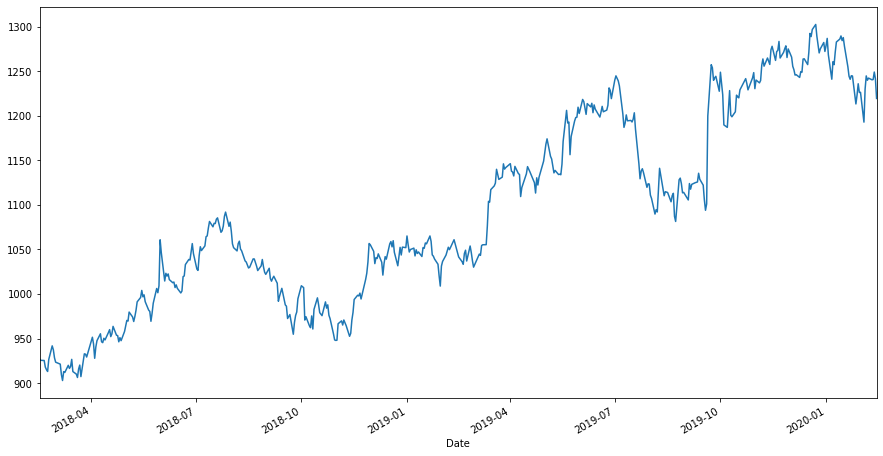

In [12]:
HDFC_df["Adj Close"].plot(figsize = (15,8))
plt.show()

In the above plot, if you notice, there is a drastic decrease in the price of stock sometime around the month of September 2018. Apart from the “September effect”, the general decline in the stock price of HDFC can be attributed to the escalating tariff war between the US and China: https://www.vox.com/world/2018/7/6/17542482/china-trump-trade-war-tariffs that had a ripple effect on Indian financial markets.

## 4. Day-to-day percentage change(Daily returns)

Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days’ closing prices. Let’s say if the closing price of the stock yesterday was ₹500 and today the stock closed as ₹550. So, the percentage change is 10%. i.e. ((550–500) / 500)*100. No mystery here!

Accordingly, we’ll introduce a new column ‘Day_Perc_Change’ denoting the daily returns in the price of the stock. This can be done using in-built pct_change() function in python.

In [13]:
HDFC_df["Day_Perc_Change"] = HDFC_df["Adj Close"].pct_change()*100
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2018-02-15,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0,NaN
2018-02-16,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0,-0.175809
2018-02-19,2018-02-19,941.30,943.80,929.53,939.10,925.32,1827276.0,-0.020529
2018-02-20,2018-02-20,942.38,942.92,929.40,931.60,917.93,2042034.0,-0.798643
2018-02-21,2018-02-21,933.97,934.28,926.10,928.70,915.07,1376536.0,-0.311571


You’ll notice that the first value in the ‘Day_Perc_Change’ column is NaN. We’ll drop this row.

In [14]:
HDFC_df.dropna(axis = 0, inplace = True)

Representing daily returns in form of a plot —

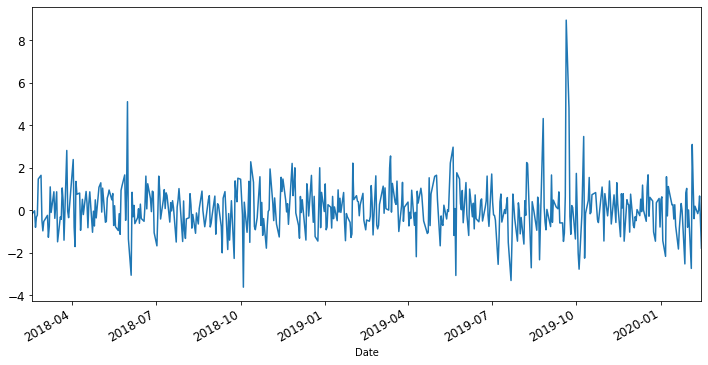

In [15]:
HDFC_df["Day_Perc_Change"].plot(figsize = (12, 6), fontsize = 12)

It can be observed that for most of the days, the returns are between -2% to 2% with few spikes in between crossing 6% mark on both the sides.

Likewise you can find similar news articles for the days when there was drastic rise/fall in the price of the stock.

Plotting daily returns distribution histogram —

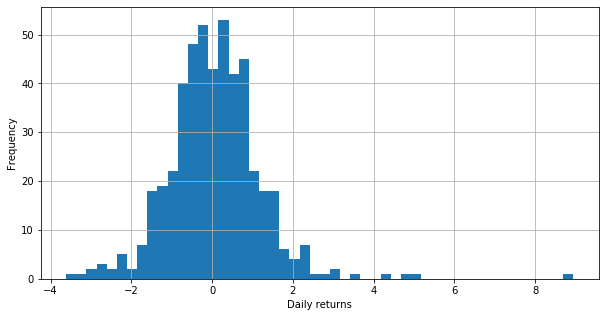

count    489.000000
mean       0.062724
std        1.162384
min       -3.614446
25%       -0.596775
50%        0.020391
75%        0.693165
max        8.950547
Name: Day_Perc_Change, dtype: float64

In [16]:
HDFC_df["Day_Perc_Change"].hist(bins = 50, figsize = (10,5)) 
plt.xlabel("Daily returns")
plt.ylabel("Frequency")
plt.show()

#satistics
HDFC_df.Day_Perc_Change.describe()

The daily returns histogram is centered about origin. For the past 2 years, the mean daily returns has been about 0.072 and for most of the days the daily return was less than 1% implying that the HDFC stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 6.46% and was 6.56% in negative direction. Clearly, we didn’t had any instances of ‘bull run’ or ‘bear drop’!

## 5. Trend Analysis

Next we add a new column ‘Trend’ whose values are based on the day-to-day percentage change we calculated above. Trend is determined from below relationship —

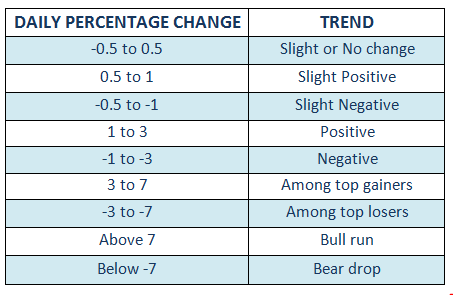

In [17]:
def trend(x):
    if x > -0.5 and x <= 0.5:
        return "Slight or No change"
    elif x > 0.5 and x <= 1:
        return "Slight Positive"
    elif x > -1 and x <= -0.5:
        return "Slight Negative"
    elif x > 1 and x <= 3:
        return "Positive"
    elif x > -3 and x <= -1:
        return "Negative"
    elif x > 3 and x <= 7:
        return "Among top gainers"
    elif x > -7 and x <= -3:
        return "Among top losers"
    elif x > 7:
        return "Bull run"
    elif x <= -7:
        return "Bear drop"
    
# HDFC_df["Trend"]= np.zeros(HDFC_df["Day_Perc_Change"].count())
HDFC_df["Trend"]= HDFC_df["Day_Perc_Change"].apply(lambda x:trend(x))
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2018-02-16,2018-02-16,941.95,947.42,937.83,939.3,925.51,1791760.0,-0.175809,Slight or No change
2018-02-19,2018-02-19,941.30,943.80,929.53,939.1,925.32,1827276.0,-0.020529,Slight or No change
2018-02-20,2018-02-20,942.38,942.92,929.40,931.6,917.93,2042034.0,-0.798643,Slight Negative
2018-02-21,2018-02-21,933.97,934.28,926.10,928.7,915.07,1376536.0,-0.311571,Slight or No change
2018-02-22,2018-02-22,925.00,930.00,920.78,926.6,913.00,6626798.0,-0.226212,Slight or No change


We wish to see how the stock was trending in past 2 years. This can be visualized as a pie chart, with each sector representing the percentage of days each trend occurred. We’ll plot a pie chart for the ‘Trend’ column to visualize the relative frequency of each trend category.

For this, we’ll use the groupby() function with the trend column to aggregate all days with the same trend into a single group before plotting the pie chart.

Visualizing Trend Frequency with Pie-Chart —

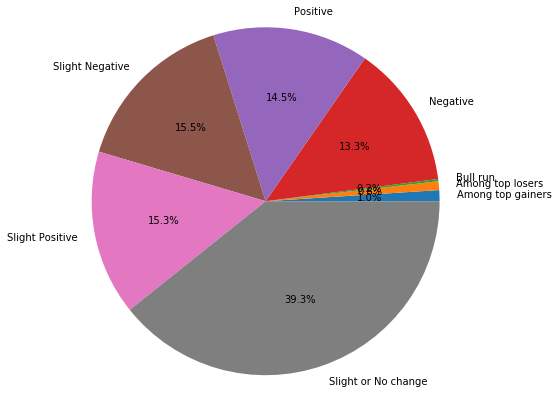

In [18]:
HDFC_pie_data = HDFC_df.groupby('Trend')
pie_label = sorted([i for i in HDFC_df.loc[:, 'Trend'].unique()])
plt.pie(HDFC_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

For the period under consideration from mid-Feb 2018 to Feb 2020, the HDFC stock was among the top gainers for about 1.8% of the time, and among the top losers for 1.6 %. For about 12.4% of the time period, the stock has performed positively on a given day. Likewise, for most period of time (about 29.6%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.

## 6. Daily Returns and Volume

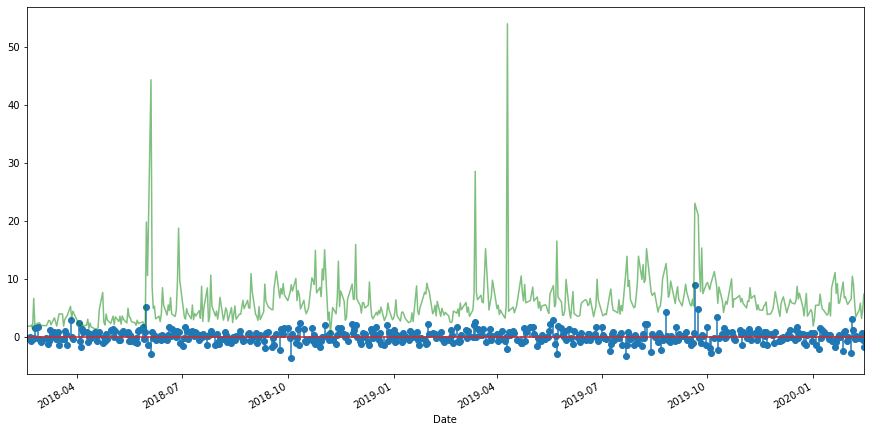

In [19]:
plt.stem(HDFC_df["Date"], HDFC_df["Day_Perc_Change"])
(HDFC_df["Volume"]/1000000).plot(figsize = (15, 7.5), 
                                 color = "green", 
                                 alpha = 0.5)

(* Daily volume of trade has been reduced in scale to match with the daily return scale)

By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders & investors in a particular company.

## 7. Correlation Analysis Of Stocks with Pair plot and Joint plots

### “Never put all your eggs in a single basket”

Whenever we go for the diversification: https://www.fidelity.com/learning-center/investment-products/mutual-funds/diversification of the portfolio, we would NOT want the stocks to be related to each other. Mathematically, Pearson’s correlation coefficient (also called Pearson’s R value) between any pair of stocks should be close to 0. The idea behind is simple — suppose your portfolio comprises of the stocks that are highly correlated, then if one stock tumbles, the others might fall too and you’re at the risk of losing all your investment!

I selected the aforementioned stocks to perform the correlation analysis. All these stocks are from different segments of Industry and Market cap. You are free to choose the stocks of your interest. the procedure remains the same.

In previous section we’ve used the pre-downloaded csv file for analysis. In this section, we’ll take the help of Pandas web data reader: https://pandas-datareader.readthedocs.io/en/latest/ package to extract the prices of stocks.

In [40]:
# load stock market data

JINDALSTEL_df = pd.read_csv("JINDALSTEL.NS.csv") 
JUBLFOOD_df = pd.read_csv("JUBLFOOD.NS.csv") 
SUNPHARMA_df = pd.read_csv("SUNPHARMA.NS.csv") 
TCS_df = pd.read_csv("TCS.NS.csv") 
NSEI_df = pd.read_csv("^NSEI.csv") 

# merge Adj. close values
combined_df = pd.concat([HDFC_df["Adj Close"], JINDALSTEL_df["Adj Close"], JUBLFOOD_df["Adj Close"], SUNPHARMA_df["Adj Close"], TCS_df["Adj Close"], NSEI_df["Adj Close"]], axis=1)
combined_df.columns = ["HDFC.NS", "JINDALSTEL.NS", "JUBLFOOD.NS", "SUNPHARMA.NS", "TCS.NS", "^NSEI"]


Drop null values and display first few rows —

In [41]:
# drop null values
combined_df.dropna(inplace = True, axis = 0)

# display first few rows
combined_df.head()

,HDFC.NS,JINDALSTEL.NS,JUBLFOOD.NS,SUNPHARMA.NS,TCS.NS,^NSEI
0,927.139465,265.350006,996.540466,565.149231,1378.560059,10545.500000
1,925.513611,251.500000,966.697205,564.658447,1381.952393,10452.299805
2,925.316528,250.000000,987.599854,551.063477,1377.495239,10378.400391
3,917.926697,252.000000,989.259155,549.198486,1387.465088,10360.400391
4,915.069214,247.300003,985.841492,516.069885,1433.422729,10397.450195


(^ NSEI is symbol for National Stock Exchange Index — NIFTY 50 )

Next we’ll analyse the correlation between the different stocks in a pair-wise fashion with Seaborn pairplot: https://seaborn.pydata.org/generated/seaborn.pairplot.html.

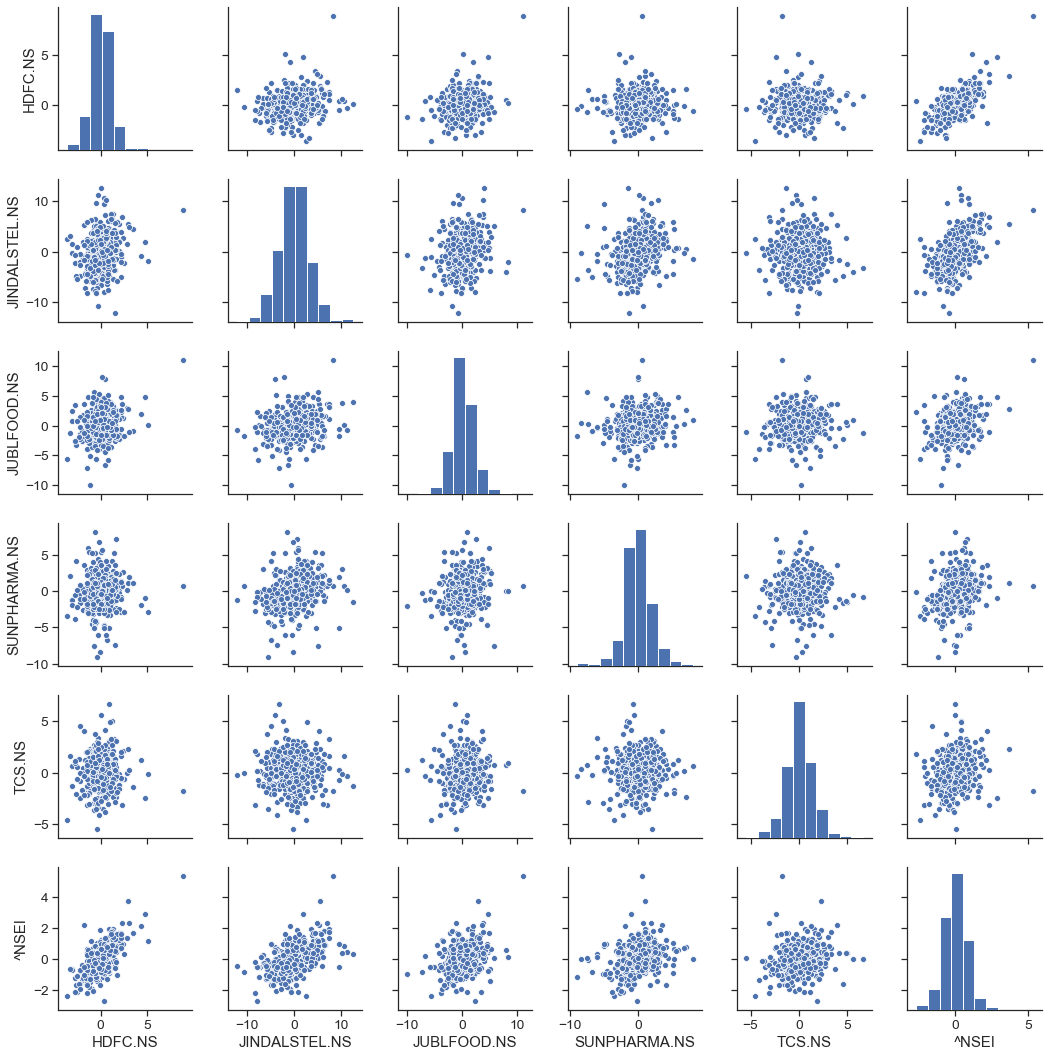

In [42]:
# store daily returns of all above stocks in a new dataframe 
pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = "any", axis = 0)

# plotting pairplot  
import seaborn as sns
sns.set(style = "ticks", font_scale = 1.25)
sns.pairplot(pct_chg_df)

Note that the correlation analysis is performed on the daily percentage change(daily returns) of the stock price and not on the stock price.

If you observe carefully, the plots in the lower triangular area are the same as the plots in the upper triangular area with just axes interchanged. So, analyzing either set of plots would suffice. The diagonal represents the histograms, just like the one seen above for HDFC stock.

### Takeaway:

HDFC, Jindal Steel, Jubilant Foods, Sun Pharma and TCS stocks can be included in a portfolio as no two stocks show any significant correlation.

### Drawback:

Although the pair plots provide very good visualization of all possible combinations between the bunch of stocks, it doesn’t provide any detailed information like Pearson’s R value or null-hypothesis p value to quantify the correlation. That’s where the joint plot comes into the picture!

While Pair plot provides a visual insight into all possible correlations, Seaborn jointplot: https://seaborn.pydata.org/generated/seaborn.jointplot.html provides detailed information like Pearson’s R value (Pearson’s correlation coefficient) for each pair of stocks. Pearson’s R value ranges from -1 to 1. Negative value indicates a negative linear relation between the variables, while positive value indicates a positive relationship. Pearson’s R value closer to 1 (or -1) indicates strong correlation, while value closer to 0 indicates weak correlation.

In addition to Pearson’s R value, joint plot also shows the respective histograms on the edges as well as null hypothesis p-value.

Here’s an example of a joint plots between the stocks of Sun Pharma vs Jindal Steel and Jindal Steel vs HDFC —

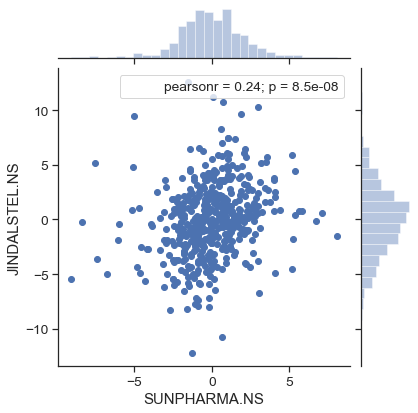

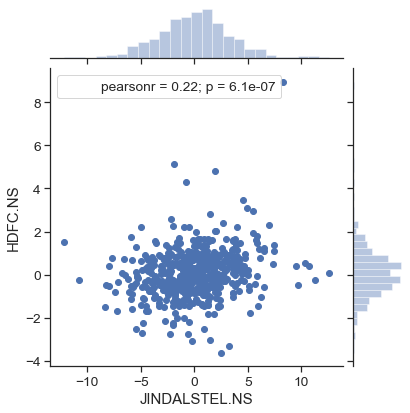

In [43]:
from scipy.stats import stats
sns.jointplot("SUNPHARMA.NS", "JINDALSTEL.NS", pct_chg_df, kind = "scatter").annotate(stats.pearsonr)
sns.jointplot("JINDALSTEL.NS", "HDFC.NS", pct_chg_df, kind = "scatter").annotate(stats.pearsonr)
plt.show()

### Takeaways:

- The Pearson’s R value is 0.24 for Jindal Steel v/s Sun Pharma which is very less. This indicates a weak correlation.

- Similarly, the Pearson’s R value is observed to be 0.29 in case of HDFC v/s Jindal Steel indicating weak correlation between HDFC and Jindal Steel stocks.

These above results from Joint plots equip us with the numerical figures to ascertain the insights we derived by visually observing the Pair plot previously.

Beware! having correlation is not the only parameter to determine which stocks to include in an portfolio and which to remove. There are several other factors at play. It’s best to seek advice of the experts and make an informed decision.

## 9. Volatility analysis

Volatility is one of the most important pillars in financial markets. A stock is said to have high volatility if its value can change dramatically within a short span of time. On other hand, lower volatility means that value of stock tends to be relatively steady over a period of time. These movements are due to several factors including demand and supply, sentiment, corporate actions, greed, and fear, etc. Mathematically, volatility is measured using a statistical measure called ‘standard deviation’, which measures an asset’s departure from its average value.

We have already calculated the intraday returns (daily returns) of the HDFC stock and several other stocks. Next, we will calculate the 7-day rolling mean(also called moving average) of the daily returns, then compute the standard deviation (which is square root of the variance) and plot the values. Relax, we don’t have to calculate all this manually; Pandas ‘rolling()’ function and ‘std()’ function does the job for us in just one line!

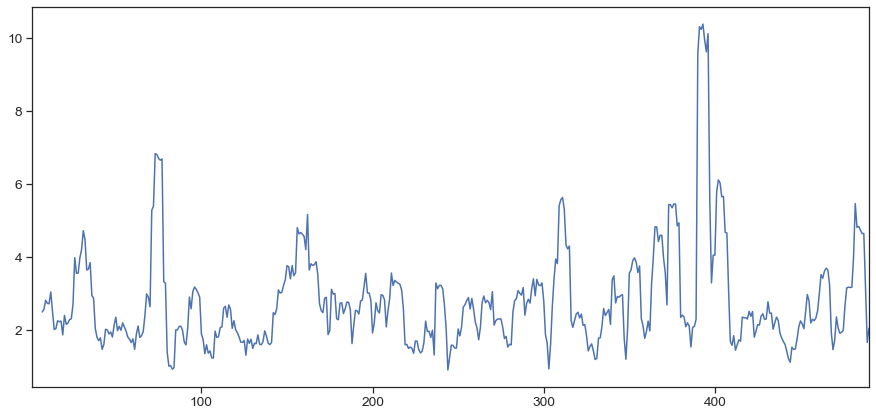

In [44]:
HDFC_vol = pct_chg_df["HDFC.NS"].rolling(7).std()*np.sqrt(7)
HDFC_vol.plot(figsize = (15, 7))

Next we’ll see the comparative volatility analysis of HDFC stock with SunPharma stock and NIFTY50 index. Just like above, we compute 7-day rolling mean, and standard deviation, all in a single line of code. Pandas indeed makes our life easy!

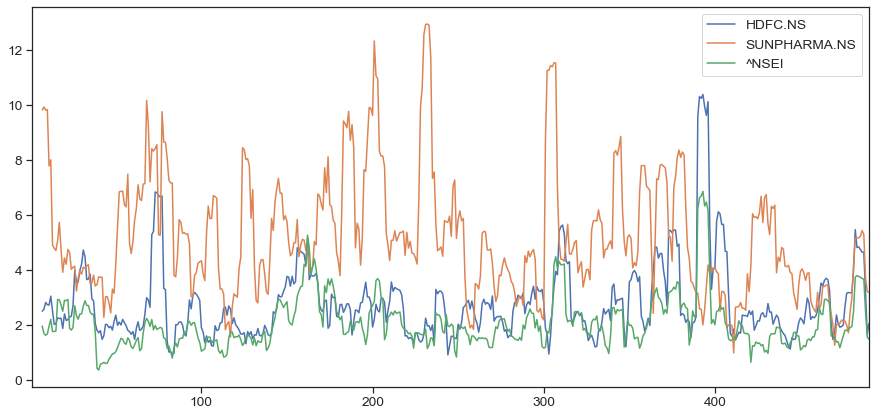

In [45]:
volatility = pct_chg_df[['HDFC.NS', 'SUNPHARMA.NS', '^NSEI']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (15, 7))

You can observe that Sun Pharma stock has higher volatility as compared to HDFC stock, while the Nifty index has least volatility. This is expected as Sun Pharma is a mid-cap stock and mid-cap stocks in general tend to have higher volatility as compared to the large-cap stocks such as HDFC.

Many traders and investors seek out higher volatility investments in order to make higher profits. If a stock does not move, not only it has low volatility, but also it has low gain potential. On the other hand, a stock or other security with a very high volatility level can have tremendous profit potential, but the risk is equally high.

## Endnotes

There is no full-proof strategy that can guarantee profit on your investment. In the real-world, there are a number of factors that traders take into account before making an investment. By using the right strategies and techniques, we can only improve our chances. I am looking forward to introduce some of these strategies & techniques along with demonstration using python in my subsequent articles.

#### References:

1. For Data — https://in.finance.yahoo.com/

2. For Finance technicalities — https://www.investopedia.com/